# INFO 2950 Discussion Section and Homework 2

# In Section

## Part 1: Getting Data
For your project you will need to collect data. There are many useful datasets freely available; do not try to reinvent the wheel!

First and foremost: Cornell Library's [list of databases](https://newcatalog.library.cornell.edu/databases) has a collection of data on likely any subject you are interested. It also has subscriptions available for students to access otherwise unavailable material. There is also [a list of dataset ideas](https://docs.google.com/document/d/1UbrWP8y4R9QgrytLdQz7KRc8bmNGh4csYNdiNnK9nfs/edit#heading=h.rj95q2rlptpz) in the INFO 2950 Student Handbook.

You should make an attempt to find pre-collected data relevant to your interests. If this fails, many companies provide open-access to their data via [API](https://www.howtogeek.com/343877/what-is-an-api/)s.

If that fails then we can turn to web-scraping. Keep in mind, many companies attempt to prevent web-scraping. If you encounter this issue, it will likely be difficult to succeed and you should consider looking for a different data source, and/or reframing your research question(s).

The following cell installs two Python packages useful for web scraping. (If you already have them installed, the code will produce a message that "Requirement already satisfied".) **If either package is actually installed by the first code cell below, you may need to close Jupyter and restart it in order to actually load the libraries in the second code cell below.**

In [1]:
# install requests and beautiful soup 
import sys
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} bs4

Traceback (most recent call last):
  File "C:\Users\pedro\anaconda3\lib\site-packages\conda\exceptions.py", line 1079, in __call__
    return func(*args, **kwargs)
  File "C:\Users\pedro\anaconda3\lib\site-packages\conda\cli\main.py", line 84, in _main
    exit_code = do_call(args, p)
  File "C:\Users\pedro\anaconda3\lib\site-packages\conda\cli\conda_argparse.py", line 81, in do_call
    module = import_module(relative_mod, __name__.rsplit('.', 1)[0])
  File "C:\Users\pedro\anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>",

Now let's load all of the packages we will need for this assignment:

In [2]:
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's illustrate an example of web-scraping by downloading the [Wikipedia article for Web Scraping](https://en.wikipedia.org/wiki/Web_scraping) using the Python [requests](https://requests.readthedocs.io/en/master/) package.

In [3]:
wikipedia_web_scraping = 'https://en.wikipedia.org/wiki/Web_scraping'
requests.get(wikipedia_web_scraping)

<Response [200]>

A response of `<Response [200]>` indicates that we have received what we have asked for. If there is another number (such as `404`), then there was likely an error. A list of http response codes can be found [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). 

The response Python object contains all the data the server would normally send a browser, including the contents of the website. Here we are interested in the data containted within the text attribute:

In [4]:
wikiResponse = requests.get(wikipedia_web_scraping)
wikiResponse.text[:2000]

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Web scraping - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"100fde85-7cc0-4829-83d3-13926aabe10a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Web_scraping","wgTitle":"Web scraping","wgCurRevisionId":1038247165,"wgRevisionId":1038247165,"wgArticleId":2696619,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 Danish-language sources (da)","CS1 French-language sources (fr)","Articles with short description","Short description matches Wikidata","Articles needing additi

This data is not exactly what we were looking for. It includes raw HTML, which is meant to be read by computers; we want to parse out human-readible text. For this, we use the Python package [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/).

In [5]:
## parse the raw wiki HTML into a BeautifulSoup object
soup = bs4.BeautifulSoup(wikiResponse.text, 'html.parser')
## let's see what it looks like by looking specifically
## at the text attribute of the soup object
print(soup.text)





Web scraping - Wikipedia

































Web scraping

From Wikipedia, the free encyclopedia



Jump to navigation
Jump to search
Data scraping used for extracting data from websites
This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed.Find sources: "Web scraping" – news · newspapers · books · scholar · JSTOR (June 2017) (Learn how and when to remove this template message)
For broader coverage of this topic, see Data scraping.
Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. The web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specifi

The `.text` attribute of our `BeautifulSoup` object has excessive white space and more text than just the article body that we really want. Luckily, HTML has structure that we can take advantage of to isolate the specific information we want. HTML stores the information displayed on the webpage in tags. For instance, hyperlinks are encoded in `a` tags:

```
<a href="www.google.com">This text will be hyperlinked to the specified URL.</a>
```

The basic tag is `<a>`. Notice that it has a matching end tag: `</a>`. The text between the tags is what actually displays on the webpage. This tag has an attribute `href`, which defines the URL to which the text links. If you're not very familiar with HTML, here is [a basic guide](https://www.w3schools.com/html/html_basic.asp). This [comprehensive reference of HTML tags](https://www.w3schools.com/tags/) may also be useful.

To extract only the specific text we want from the Wikipedia webpage, we need to inspect the raw HTML to figure out how the data we want is being stored (e.g. in which tags or which attributes of tags). One way to do this is to open the page in a web browser, right clicking anywhere on the page, and selecting 'Inspect' or 'View Page Source'. In some web browsers, like Google Chrome, as you mouse over various tags in the raw HTML, the corresponding element will be highlighted in the displayed page. Keep in mind, if the webpage uses Javascript or dynamic programming, then what you view using the browser tool will not be the same data received via the `requests` package. Instead, you'll want to dump the static version of the web page downloaded via `requests` to an `.html` file on your computer, and then inspect it in a browser as above. 

Let's dump the scraped text into a file that we can open to inspect:

In [6]:
wiki_file = 'wikipedia_web_scrape.html'

with open(wiki_file, mode='w', encoding='utf-8') as f:
    f.write(wikiResponse.text)

You can also open the raw HTML file in a text editor and use the 'Find' tool (CTRL/CMD + F) to help figure out how data of interest is stored.

After inspecting this saved file, it looks like the main text of the web page is within paragraph tags (`<p>`) inside the `<body>` tag.

In [7]:
tags = soup.body.findAll('p')
for pTag in tags[2:3]:
    print(pTag.text)

Web scraping is used for contact scraping, and as a component of applications used for web indexing, web mining and data mining, online price change monitoring and price comparison, product review scraping (to watch the competition), gathering real estate listings, weather data monitoring, website change detection, research, tracking online presence and reputation, web mashup and, web data integration.



We can also save this text as a `pandas` dataframe to make it easier to analyse down the line:

In [8]:
paragraphs = []
for pTag in tags:
    paragraphs.append(pTag.text)
## convert the list to pandas
df = pd.DataFrame({'paragraph' : paragraphs})
df.head()

,paragraph
0,"Web scraping, web harvesting, or web data extr..."
1,Web scraping a web page involves fetching it a...
2,"Web scraping is used for contact scraping, and..."
3,Web pages are built using text-based mark-up l...
4,Newer forms of web scraping involve monitoring...


## Part 2: NumPy Crash Course

NumPy is a Python package fundamental for data science. Refer to the [documentation](https://numpy.org/doc/stable/) if you are stuck on any problems and take a look at the the [quickstart tutorial](https://numpy.org/doc/stable/user/quickstart.html) to help develop your skills.

The main array object used in NumPy is the `ndarray`. NumPy arrays are stored in a continuous place in memory, which allows your computer to process these objects up to 50x faster than Python Lists. It supports integers, booleans, floats, strings, and more, but unlike Python Lists, all entries of an `ndarray` must have the same data type. 



In [9]:
arr1 = np.array([1,7,5,2,4])

In [10]:
arr1.dtype

dtype('int32')

In [11]:
arr2 = np.array([2.1,3,4,1,5])

In [12]:
arr2.dtype

dtype('float64')

Numpy arrays support broadcasting of certain operations.  Broadcasted operations are applied elementwise to each member of the ndarray, without the need for an explicit for loop:

In [13]:
# elementwise adddition of two ndarrays
arr1 + arr2

array([ 3.1, 10. ,  9. ,  3. ,  9. ])

In [14]:
# elementwise multiplication
arr1 * 2

array([ 2, 14, 10,  4,  8])

In [15]:
# elementwise exponentiation
arr1 ** 2

array([ 1, 49, 25,  4, 16], dtype=int32)

and conditionals:

In [16]:
arr1 >= 5

array([False,  True,  True, False, False])

Passing this boolean array into the original array returns the correct values indexed in the original array:

In [17]:
arr1[arr1 >= 5]

array([7, 5])

NumPy arrays are multidimensional, and have built in support for common methods used in linear algebra (e.g. matrix multiplication):

In [18]:
arr3 = np.array([[1,1],[0,1]])

In [19]:
arr3

array([[1, 1],
       [0, 1]])

In [20]:
# matrix multiplication
arr3 @ arr3

array([[1, 2],
       [0, 1]])

In [21]:
arr3.shape

(2, 2)

In [22]:
arr3.size

4

Numpy arrays can be accessed using an index (keep in mind Python indices start at 0):

In [23]:
arr3[1,0] = 4

In [24]:
arr3

array([[1, 1],
       [4, 1]])

---

# Homework

# Part 1: `numpy`

#### Problem 1
Use a `numpy` function similar to Python's `range()` function to create a numpy array of integers from 0-19. Then use the `numpy.reshape()` command to change the array's shape to 5 rows and 4 columns. The numbers should increment row-wise within the array. Print the final result.

*(**Hint:** the `numpy` equivalent to Python's `range()` function can be found in the [quickstart tutorial](https://numpy.org/doc/stable/user/quickstart.html).)*

In [25]:
np.arange(0,20)
np.reshape(np.arange(0,20), (5,4), order = "C")

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

#### Problem 2:
Beyond integers, `numpy` can generate a list of evenly spaced values within a specified interval using `numpy.linspace()`. Use this function to create an array of 5 evenly spaced values between 0 and 20. Print the final result.

In [26]:
np.linspace(0,20,5)
#help(np.linspace)

array([ 0.,  5., 10., 15., 20.])

#### Problem 3:
`numpy.zeros()` is a function to instantiate an numpy array of zeros. Use this function to create a new array of zeros with 2 rows and 4 columns with an integer datatype. Then use a nested for loop to iterate over the row and column indices, filling the entries row-wise with the integers from 30 to 37.

Print the final array, as well as the data type of the first entry in the array (using the `numpy.dtype` function).

In [27]:
zero_array = np.zeros((2,4), int)
print(zero_array)
print([*range(len(zero_array))])

zero_array[1]

[[0 0 0 0]
 [0 0 0 0]]
[0, 1]


array([0, 0, 0, 0])

In [28]:
zero_array = np.zeros((2,4), int)
for row in [*range(len(zero_array))]:
     for col in [*range(len(zero_array[row]))]:
        for num in range(30,38):
            zero_array[row,col] = num

print(zero_array)
print(np.dtype(zero_array[0,0]))

[[37 37 37 37]
 [37 37 37 37]]
int32


---

# Part 2: Exploratory data analysis

Our overarching goal in this course is to **explain variation** observed in data, which may be complex, with many observations *(rows)* and variables *(columns)*. Explaining variation involves finding the most plausible process(es) *(properties of and relationships between columns)* that generated the observations *(rows)*. To do so, we poke and prod the data in various ways to uncover patterns; this is often referred to as **exploratory data analysis**.

Histograms are a good first step in exploratory data analysis as they only involve information about **one variable**. Before moving on to modelling the relationship between two or more variables, it's good to know more about each individual variable.

We can easily make histograms in Python using the function `hist()` from the submodule `matplotlib.pyplot` (here's the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html), as well [a nice overview](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) about how to create histograms in Python).

---

#### Problem 4
Import the submodule `matplotlib.pyplot` as `plt`. Load the file `books.csv` as a `pandas DataFrame` called `books`. Plot a histogram for the `price` column using `plt.hist()`. Label the $x-$ and $y-$axes with "book price" and "count", respectively. Explain why the histogram is not useful.

Text(0, 0.5, 'count')

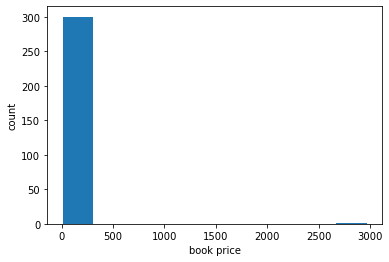

In [29]:
import matplotlib.pyplot as plt
books = pd.read_csv("books.csv")
plt.hist(books["price"])
plt.xlabel('book price')
plt.ylabel('count')


This histogram is not useful because it includes at least one book with a very large price, so the majority of the data is depicted in one bin. As a result, the histogram does not give us a lot of information about the distribution of the price of most books in the dataset.

#### Problem 5: 

Update the `books` dataframe to exclude the observation with the largest book price and re-make the histogram from problem 4 with the updated dataframe. 

**Note:** all subsequent problems should use the updated `books` data frame, which excludes the row corresponding to the largest book price in the original data.

Text(0, 0.5, 'count')

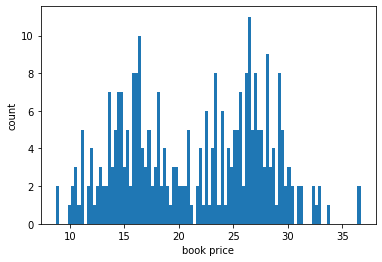

In [30]:
over_priced = books.loc[books.price.idxmax()]
books = books.drop(books.price.idxmax())
plt.hist(books["price"], bins = 100)
plt.xlabel('book price')
plt.ylabel('count')

---

This distribution has two peaks: one around fifteen dollars and one around twenty-seven. Why might this distribution have two peaks...? (See [here](https://www.slj.com/?detailStory=sljs-average-book-prices-2018) for a hint.) Knowing that the distribution of book prices has two peaks (and having an idea of what might drive this pattern) could affect modelling choices we make down the line.

A small group of observations that are significantly far from the bulk of the data are called **outliers**. Outliers may be interesting points to investigate further, or they may result from data entry errors. In this case, notice that the maximum book price in the original data set is about 100x larger than the rest of the prices. This likely resulted from this price being entered without a decimal point, and so is probably a simple data entry error.

Histograms are one way to detect outliers. In general, histograms can allow us to **detect outliers** within single variables of our data. We can usually correct for these outliers, but only if we know about them! Consider experimenting with the `range` and `bin` parameters within the `hist()` function (ex: hist(bins=100)) to familiarize yourself with different ways of visualizing data and accounting for outliers.



#### Problem 6:
Lets examine how the price of a book might vary as a function of its publication year (Perhaps older, rarer, books command a premium?). Loop over the publication years listed in books, and produce a plot of the average price of books as a function of year. When iterating through each publication year, use a list comprehension rather than a groupby or for loop.  (Please note that in general, groupby is preferred for this operation, use a list comprehension for pedagogical reasons).  Be sure to approriately label your axes.  Do you see any discernible trend?

*Hint: You may find it useful to [subset your dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#the-where-method-and-masking) for each year and the use the `.mean()` on the price column.  You will also want to sort your years to produce a nice graph, look up np.sort.*

Text(0, 0.5, 'average price')

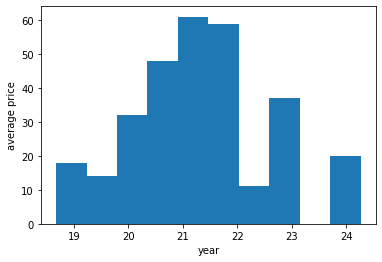

In [31]:
books.sort_values("publication_year", ascending = True)
mean_by_year = [books.loc[books.publication_year == year].price.mean() for year in books.publication_year]
plt.hist(mean_by_year)
plt.xlabel('year')
plt.ylabel("average price")

#### Problem 7
Create a histogram of the number of books published ($y-$axis) per genre ($x-$axis). Be sure to clearly label each axis and give the chart an appropriate title. 

Text(0.5, 1.0, 'Books Published By Genre')

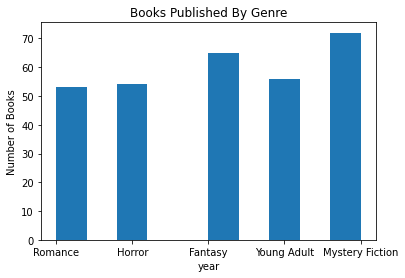

In [32]:
#books.head(4)
plt.hist(books["genre"])
plt.xlabel('year')
plt.ylabel("Number of Books")
plt.title("Books Published By Genre")

#### Problem 8

For each genre, calculate the mean and standard deviation for book prices within that genre and print the results. Do this with a regular for loop, later we'll use a groupby.

**When printing numbers throughout this notebook, please round to two decimal places and provide context for the number.** 

*(**Hint:** A pandas column is usually accessed as a `pandas.Series` (a one-dimensional array). These arrays have methods to calculate summary statistics, like the mean, median, variance, and standard deviation.)*

In [33]:
# for genre in books.genre:
#     prices = []
#     for price in books.price:
#         prices.append(price)
#         mean = sum(prices)/len(prices)
# print(mean)

mean_books_by_genre = books.groupby(['genre'])['price'].mean().round(2)
std_books_by_genre = books.groupby(['genre'])['price'].std().round(2)
var_books_by_genre = books.groupby(['genre'])['price'].var().round(2)
print(f"The mean by genre is: {mean_books_by_genre}")
print(f"The std by genre is: {std_books_by_genre}")
print(f"The variance by genre is: {var_books_by_genre}")

The mean by genre is: genre
Fantasy            20.97
Horror             21.33
Mystery Fiction    20.71
Romance            22.53
Young Adult        21.55
Name: price, dtype: float64
The std by genre is: genre
Fantasy            5.89
Horror             5.96
Mystery Fiction    6.28
Romance            5.91
Young Adult        7.19
Name: price, dtype: float64
The variance by genre is: genre
Fantasy            34.71
Horror             35.53
Mystery Fiction    39.40
Romance            34.92
Young Adult        51.65
Name: price, dtype: float64


#### Problem 9
Normalization is a technique which is often applied to data for purposes of hypothesis testing and for ease of analysis.  Divide all Fantasy book prices by the corresponding standard deviation calculated above, and then recalculate the variance and standard deviation of this newly scaled data and print the results.  Give a comment explaining why your new results make sense.

In [34]:
fantasy_books = books.loc[books['genre'] == "Fantasy"]
fantasy_books['normalized_price'] = [price/std_books_by_genre.loc["Fantasy"] for price in fantasy_books.price]
new_fantasy_books_std = fantasy_books['normalized_price'].std()
new_fantasy_books_var = fantasy_books['normalized_price'].var()

print(f"The new standard deviation is {new_fantasy_books_std}.")
print(f"The new variance is {new_fantasy_books_var}.")

The new standard deviation is 1.0002256168361807.
The new variance is 1.0004512845753182.


<ipython-input-34-f0841a1b3362>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fantasy_books['normalized_price'] = [price/std_books_by_genre.loc["Fantasy"] for price in fantasy_books.price]


#### Problem 10
Now, multiply the unnormalized fantasy book price data by 2, and compute both the standard deviation and variance of this data. How does it compare to the standard deviation and variance computed in problem 8?  Specifically, compute the ratio of these standard deviations and variances, and briefly explain how scaling the data by a factor of two changed these quantities.  When comparing the ratio of variances to ratio of standard deviations, why would this finding make sense?

In [35]:
new_price = fantasy_books.price * 2
big_std = round(new_price.std(), 2)
big_var = round(new_price.var(), 2)

std_ratio = big_std/ std_books_by_genre.loc["Fantasy"]
std_ratio = std_ratio.round(2)
var_ratio = big_var/var_books_by_genre.loc["Fantasy"]
var_ratio = var_ratio.round(2)

print(f"The new std is {big_std} and the new variance is {big_var}. \
Here we can see that the std increased by a ratio of {std_ratio}, and the variance \
increased by a ratio of {var_ratio}. This finding makes sense, since variance is the squareroot \
of the std.")

The new std is 11.78 and the new variance is 138.83. Here we can see that the std increased by a ratio of 2.0, and the variance increased by a ratio of 4.0. This finding makes sense, since variance is the squareroot of the std.


#### Problem 11

A [box plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) depicts the distribution of a numerical variable based on different categorical groups. The box edges are defined by the first and third quartiles of the data, with a line at the median (the second quartile). The whiskers extend from the edges of box to show the range of (most of) the data. Some boxplot methods use the whiskers to show the *entire* range of the data, while others go to some multiple of the standard deviation (usually 1.5$\sigma$ or 2$\sigma$) and represent data beyond that (outliers) by single points.

Use `pandas` to create a box plot of our price data grouped by genre. Which genre has the largest price range? Which has the largest median?

Here we can see that the yound adult genre has the largest price range.


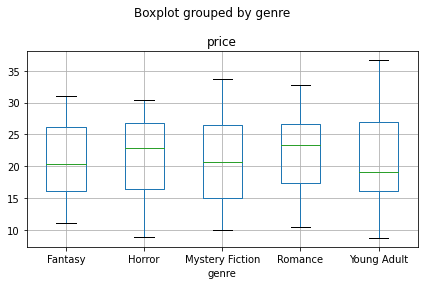

In [36]:
#price_by_genre = books.groupby(['genre'])['price']
books.boxplot('price', by='genre')
plt.tight_layout()
print("Here we can see that the yound adult genre has the largest price range.")

#### Problem 12
Calculate the mean and standard deviation of the price of all books published from 2010 on (inclusive).

**Remember to print your answer with context and rounded to two decimal places.**

*(**Hint:** you may find the the `pandas` `DataFrame` method [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) useful.)*

In [37]:

books_after_2010 = books.loc[books['publication_year'] >= 2010]
mean_price_2010 = round( books_after_2010["price"].mean(), 2)
std_price_2010 = round( books_after_2010["price"].std(), 2)

print(f"The mean price for books published on or after 2010 is {mean_price_2010}, and the \
standard deviation for these years is {std_price_2010}.")



The mean price for books published on or after 2010 is 21.05, and the standard deviation for these years is 6.2.


#### Problem 13
In part 8, we used a for loop to compute mean price as a function of genre.  Now, use the `pandas` `DataFrame` `.groupby()` method to group the data by genre and calculate the mean price for each group, your results should match those earlier computed.

**Print your answer with context, rounded to two decimal places**

*(**Hint:** `pandas` `DataFrame` objects have a `.mean()` method.)*

In [38]:
mean_books_by_genre = books.groupby(['genre'])['price'].mean().round(2)
print(f"The mean by genre is: {mean_books_by_genre}")

The mean by genre is: genre
Fantasy            20.97
Horror             21.33
Mystery Fiction    20.71
Romance            22.53
Young Adult        21.55
Name: price, dtype: float64


---

## Part 3: From web scraping to web crawling

#### Problem 14
The web scraping example from discussion section using the `requests` and`BeautifulSoup` packages demonstrated how to extract paragraphs from a Wikipedia page. What if we were interested in all the content related to that topic, which may span several articles, stored on different web pages? Wikipedia conveniently includes hyperlinks to other Wikipedia pages for related content within the body of an article's web page.

For this problem use `requests` and`BeautifulSoup` to extract a list of all the `<a>` tags within the text body of the [Data Science](https://en.wikipedia.org/wiki/Data_science) page. These `<a>` tags define a hyperlink and contain an href attribute, which contain the hyperlink's destination. 

_(**Hint:** the provided example already demonstrates how to find all the HTML `<p>` tags. Within those paragraphs is another element to identify hyperlinks, the `<a>` tag, which can be found using the `.findAll()` method for `BeautifulSoup` objects.)_

**Confidence check: this list should contain the first ten elements:
```
[<a class="mw-redirect" href="/wiki/Inter-disciplinary" title="Inter-disciplinary">inter-disciplinary</a>,
 <a href="/wiki/Knowledge" title="Knowledge">knowledge</a>,
 <a href="/wiki/Unstructured_data" title="Unstructured data">unstructured data</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="#cite_note-2">[2]</a>,
 <a href="/wiki/Data_mining" title="Data mining">data mining</a>,
 <a href="/wiki/Machine_learning" title="Machine learning">machine learning</a>,
 <a href="/wiki/Big_data" title="Big data">big data</a>,
 <a href="/wiki/Statistics" title="Statistics">statistics</a>,
 <a href="/wiki/Data_analysis" title="Data analysis">data analysis</a>]
 ```



In [39]:
tags = soup.body.findAll('a', href = True)
for aTag in tags[3:]:
    print(aTag)
paragraphs = []
for ATag in tags:
    paragraphs.append(aTag.text)

<a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a>
<a class="external text" href="https://en.wikipedia.org/w/index.php?title=Web_scraping&amp;action=edit">improve this article</a>
<a href="/wiki/Help:Referencing_for_beginners" title="Help:Referencing for beginners">adding citations to reliable sources</a>
<a class="external text" href="//www.google.com/search?as_eq=wikipedia&amp;q=%22Web+scraping%22" rel="nofollow">"Web scraping"</a>
<a class="external text" href="//www.google.com/search?tbm=nws&amp;q=%22Web+scraping%22+-wikipedia" rel="nofollow">news</a>
<a class="external text" href="//www.google.com/search?&amp;q=%22Web+scraping%22&amp;tbs=bkt:s&amp;tbm=bks" rel="nofollow">newspapers</a>
<a class="external text" href="//www.google.com/search?tbs=bks:1&amp;q=%22Web+scraping%22+-wikipedia" rel="nofollow">books</a>
<a class="external text" href="//scholar.google.com/scholar?q=%22Web+scraping%22" rel="nofollow">scholar</a>
<a class="external text" h

#### Problem 15
Remember, each `<a>` tag element contains an `href` attribute, which indicate's the hyperlink's destination. From the list you created in problem 14 create a new list of only the Wikipedia URLS. Keep only the `href` attributes that include the string "/wiki/" then append each of these to the end of the Wikipedia URL: "https://en.wikipedia.org".

Put the list in alphabetical order.

_**Confidence check:** The final list should start with:_

```
'https://en.wikipedia.org/wiki/American_Statistical_Association'
 ```

In [40]:
links = [a.get('href') for a in soup.find_all('a', href=True)] 
wiki_links = []
for link in links:
    if "/wiki/" in link: 
        wiki_links.append("https://en.wikipedia.org" + link)
print(wiki_links)



['https://en.wikipedia.org/wiki/File:Question_book-new.svg', 'https://en.wikipedia.org/wiki/Wikipedia:Verifiability', 'https://en.wikipedia.org/wiki/Help:Referencing_for_beginners', 'https://en.wikipedia.org/wiki/Help:Maintenance_template_removal', 'https://en.wikipedia.org/wiki/Data_scraping', 'https://en.wikipedia.org/wiki/Data_scraping', 'https://en.wikipedia.org/wiki/Data_extraction', 'https://en.wikipedia.org/wiki/Website', 'https://en.wikipedia.org/wiki/World_Wide_Web', 'https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol', 'https://en.wikipedia.org/wiki/Internet_bot', 'https://en.wikipedia.org/wiki/Web_crawler', 'https://en.wikipedia.org/wiki/Database', 'https://en.wikipedia.org/wiki/Data_retrieval', 'https://en.wikipedia.org/wiki/Data_analysis', 'https://en.wikipedia.org/wiki/Parsing', 'https://en.wikipedia.org/wiki/Contact_scraping', 'https://en.wikipedia.org/wiki/Web_indexing', 'https://en.wikipedia.org/wiki/Web_mining', 'https://en.wikipedia.org/wiki/Data_mining', 'htt